# ========== Data analysis project ===========

## import libraies

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

# import csv files

# Dataset 1

In [2]:
data1 = pd.read_csv("C:\\Users\\HP\\Desktop\\New folder\\d1.csv")
data1

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


In [3]:
data1.shape

(610, 10)

In [4]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
605    False
606    False
607    False
608    False
609    False
Length: 610, dtype: bool

In [5]:
data1.drop_duplicates(inplace = True)

In [6]:
data1.shape

(610, 10)

In [7]:
data1.rename(columns= {"dteday" : 'Date',
                        "yr" : "year",
                        "mnth" : "month",
                         "hr" : "hours",
                        "temp" : "temperature1",
                        "instant": "serial no"},inplace = True)


In [8]:
data1.columns


Index(['serial no', 'Date', 'season', 'year', 'month', 'hours', 'holiday',
       'weekday', 'weathersit', 'temperature1'],
      dtype='object')

In [9]:
# datatype changed in date columns 

data1["Date"] = data1["Date"].astype("datetime64[ns]")

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   serial no     610 non-null    int64         
 1   Date          610 non-null    datetime64[ns]
 2   season        610 non-null    int64         
 3   year          610 non-null    int64         
 4   month         610 non-null    int64         
 5   hours         610 non-null    int64         
 6   holiday       610 non-null    bool          
 7   weekday       610 non-null    int64         
 8   weathersit    610 non-null    int64         
 9   temperature1  610 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 43.6 KB


In [11]:
# find data types in list

data1.select_dtypes(include = "int64").columns.tolist()


['serial no', 'season', 'year', 'month', 'hours', 'weekday', 'weathersit']

In [12]:
data1.select_dtypes(exclude = "int64").columns.tolist()

['Date', 'holiday', 'temperature1']

In [13]:
data1.select_dtypes(include = "int64").nunique()

serial no     610
season          1
year            1
month           1
hours          24
weekday         7
weathersit      4
dtype: int64

In [14]:
data1.select_dtypes(exclude = "int64").nunique()

Date            28
holiday          2
temperature1    23
dtype: int64

In [15]:
data1["Date"].unique()

<DatetimeArray>
['2011-01-01 00:00:00', '2011-02-01 00:00:00', '2011-03-01 00:00:00',
 '2011-04-01 00:00:00', '2011-05-01 00:00:00', '2011-06-01 00:00:00',
 '2011-07-01 00:00:00', '2011-08-01 00:00:00', '2011-09-01 00:00:00',
 '2011-10-01 00:00:00', '2011-11-01 00:00:00', '2011-12-01 00:00:00',
 '2011-01-13 00:00:00', '2011-01-14 00:00:00', '2011-01-15 00:00:00',
 '2011-01-16 00:00:00', '2011-01-17 00:00:00', '2011-01-18 00:00:00',
 '2011-01-19 00:00:00', '2011-01-20 00:00:00', '2011-01-21 00:00:00',
 '2011-01-22 00:00:00', '2011-01-23 00:00:00', '2011-01-24 00:00:00',
 '2011-01-25 00:00:00', '2011-01-26 00:00:00', '2011-01-27 00:00:00',
 '2011-01-28 00:00:00']
Length: 28, dtype: datetime64[ns]

In [16]:
data1[["season","year","month"]].drop_duplicates()

,season,year,month
0,1,0,1


In [17]:
data1["weathersit"].drop_duplicates()

0      1
5      2
18     3
585    4
Name: weathersit, dtype: int64

In [18]:
# drop unnecessary columns in dataset1

data1.drop(columns = ["season","year","month"],axis= 1,inplace = True)

In [19]:
data1

,serial no,Date,hours,holiday,weekday,weathersit,temperature1
0,1,2011-01-01,0,False,6,1,0.24
1,2,2011-01-01,1,False,6,1,0.22
2,3,2011-01-01,2,False,6,1,0.22
3,4,2011-01-01,3,False,6,1,0.24
4,5,2011-01-01,4,False,6,1,0.24
...,...,...,...,...,...,...,...
605,606,2011-01-28,11,False,5,3,0.18
606,607,2011-01-28,12,False,5,3,0.18
607,608,2011-01-28,13,False,5,3,0.18
608,609,2011-01-28,14,False,5,3,0.22


# Dataset 2

In [20]:
data2 = pd.read_csv("C:\\Users\\HP\\Desktop\\New folder\\d2.csv")
data2

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [21]:
data2.shape

(610, 8)

In [22]:
data2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
605    False
606    False
607    False
608    False
609    False
Length: 610, dtype: bool

In [23]:
data2.drop_duplicates( inplace = True)
data2


,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [24]:
data2.shape

(610, 8)

In [25]:
# drop unnecessary columns in dataset2  

data2.drop( columns = ["Unnamed: 0","instant","cnt"],axis = 1,inplace = True)

In [26]:
data2.rename (columns = {"atemp" : "temperature",
                          "hum" : "humidity"},inplace = True)

In [27]:
data2

,temperature,humidity,windspeed,casual,registered
0,0.2879,0.81,0.0000,3,13
1,0.2727,0.80,0.0000,8,32
2,0.2727,0.80,0.0000,5,27
3,0.2879,0.75,0.0000,3,10
4,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...
605,0.2121,0.93,0.1045,0,30
606,0.2121,0.93,0.1045,1,28
607,0.2121,0.93,0.1045,0,31
608,0.2727,0.80,0.0000,2,36


In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  599 non-null    float64
 1   humidity     610 non-null    float64
 2   windspeed    610 non-null    float64
 3   casual       610 non-null    int64  
 4   registered   610 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 24.0 KB


# Data cleaning

In [29]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [30]:
data1.columns.tolist()

['serial no',
 'Date',
 'hours',
 'holiday',
 'weekday',
 'weathersit',
 'temperature1']

In [31]:
data2.columns.tolist()   

['temperature', 'humidity', 'windspeed', 'casual', 'registered']

In [32]:
print(f'shape of data1 : {data1.shape}')
print(f'shape of data2 : {data2.shape}')

shape of data1 : (610, 7)
shape of data2 : (610, 5)


In [33]:
# find null value in data set 1

data1.isnull().sum()

serial no       0
Date            0
hours           0
holiday         0
weekday         0
weathersit      0
temperature1    0
dtype: int64

In [34]:
# find null value in data set 2

data2.isnull().sum()

temperature    11
humidity        0
windspeed       0
casual          0
registered      0
dtype: int64

In [35]:
print(f'null percentage of  Data set 2 : \n{data2.isnull().sum() / data2.shape[0]  * 100}')

null percentage of  Data set 2 : 
temperature    1.803279
humidity       0.000000
windspeed      0.000000
casual         0.000000
registered     0.000000
dtype: float64


In [36]:
print(f' total null percentage of data2 : {round(data2.isnull().sum().sum() / data2.shape[0] * 100,3 )} %')

 total null percentage of data2 : 1.803 %


In [37]:
# filled null value in dataset 2 by using a mode filling

data2["temperature"].mode()[0]
data2["temperature"].fillna(data2["temperature"].mode()[0], inplace = True)


<Axes: >

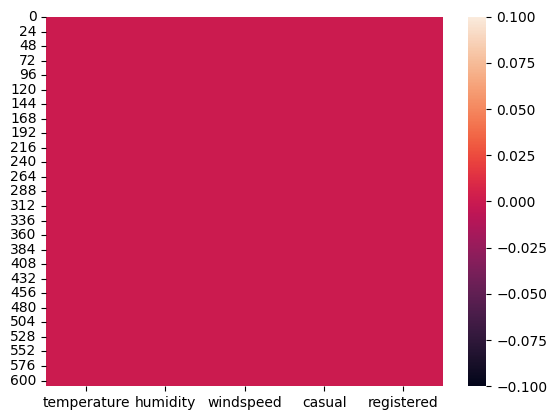

In [38]:
#  no null data found in data2 set

sns.heatmap(data2.isnull())


In [39]:
data2.isnull().sum()

temperature    0
humidity       0
windspeed      0
casual         0
registered     0
dtype: int64

In [40]:
data2

,temperature,humidity,windspeed,casual,registered
0,0.2879,0.81,0.0000,3,13
1,0.2727,0.80,0.0000,8,32
2,0.2727,0.80,0.0000,5,27
3,0.2879,0.75,0.0000,3,10
4,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...
605,0.2121,0.93,0.1045,0,30
606,0.2121,0.93,0.1045,1,28
607,0.2121,0.93,0.1045,0,31
608,0.2727,0.80,0.0000,2,36


# Concat Data set 1 and Data set 2

In [41]:
data4 = pd.concat([data1,data2],axis = 1)
data4

,serial no,Date,hours,holiday,weekday,weathersit,temperature1,temperature,humidity,windspeed,casual,registered
0,1,2011-01-01,0,False,6,1,0.24,0.2879,0.81,0.0000,3,13
1,2,2011-01-01,1,False,6,1,0.22,0.2727,0.80,0.0000,8,32
2,3,2011-01-01,2,False,6,1,0.22,0.2727,0.80,0.0000,5,27
3,4,2011-01-01,3,False,6,1,0.24,0.2879,0.75,0.0000,3,10
4,5,2011-01-01,4,False,6,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,2011-01-28,11,False,5,3,0.18,0.2121,0.93,0.1045,0,30
606,607,2011-01-28,12,False,5,3,0.18,0.2121,0.93,0.1045,1,28
607,608,2011-01-28,13,False,5,3,0.18,0.2121,0.93,0.1045,0,31
608,609,2011-01-28,14,False,5,3,0.22,0.2727,0.80,0.0000,2,36


In [42]:
data4.drop(columns=["temperature1"],inplace = True)

In [43]:
data4.set_index(["serial no"],inplace = True)

In [44]:
data4

,Date,hours,holiday,weekday,weathersit,temperature,humidity,windspeed,casual,registered
serial no,,,,,,,,,,
1,2011-01-01,0,False,6,1,0.2879,0.81,0.0000,3,13
2,2011-01-01,1,False,6,1,0.2727,0.80,0.0000,8,32
3,2011-01-01,2,False,6,1,0.2727,0.80,0.0000,5,27
4,2011-01-01,3,False,6,1,0.2879,0.75,0.0000,3,10
5,2011-01-01,4,False,6,1,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...
606,2011-01-28,11,False,5,3,0.2121,0.93,0.1045,0,30
607,2011-01-28,12,False,5,3,0.2121,0.93,0.1045,1,28
608,2011-01-28,13,False,5,3,0.2121,0.93,0.1045,0,31


In [45]:
data4.shape

(610, 10)

# central tendency

In [46]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 1 to 610
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         610 non-null    datetime64[ns]
 1   hours        610 non-null    int64         
 2   holiday      610 non-null    bool          
 3   weekday      610 non-null    int64         
 4   weathersit   610 non-null    int64         
 5   temperature  610 non-null    float64       
 6   humidity     610 non-null    float64       
 7   windspeed    610 non-null    float64       
 8   casual       610 non-null    int64         
 9   registered   610 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5)
memory usage: 48.3 KB


In [47]:
data4.describe()

,Date,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered
count,610,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,2011-03-27 17:16:19.672131072,11.795082,2.977049,1.477049,0.199882,0.562475,0.204851,4.501639,51.068852
min,2011-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.210000,0.000000,0.000000,0.000000
25%,2011-01-18 00:00:00,6.000000,1.000000,1.000000,0.151500,0.432500,0.104500,0.000000,14.000000
50%,2011-01-25 00:00:00,12.000000,3.000000,1.000000,0.197000,0.520000,0.194000,2.000000,43.000000
75%,2011-06-01 00:00:00,18.000000,5.000000,2.000000,0.227300,0.690000,0.283600,6.000000,70.000000
max,2011-12-01 00:00:00,23.000000,6.000000,4.000000,0.454500,1.000000,0.582100,47.000000,247.000000
std,NaN,6.852107,2.054943,0.643496,0.078121,0.175440,0.121806,6.319945,47.021204


In [48]:
data4.mean()

Date           2011-03-27 17:16:19.672131072
hours                              11.795082
holiday                             0.039344
weekday                             2.977049
weathersit                          1.477049
temperature                         0.199882
humidity                            0.562475
windspeed                           0.204851
casual                              4.501639
registered                         51.068852
dtype: object

In [49]:
data4.median()

Date           2011-01-25 00:00:00
hours                         12.0
holiday                        0.0
weekday                        3.0
weathersit                     1.0
temperature                  0.197
humidity                      0.52
windspeed                    0.194
casual                         2.0
registered                    43.0
dtype: object

In [50]:
data4.mode()

,Date,hours,holiday,weekday,weathersit,temperature,humidity,windspeed,casual,registered
0,2011-01-01,12.0,False,6.0,1.0,0.197,0.47,0.1642,0.0,1.0
1,2011-01-13,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-15,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-16,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-17,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-20,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data set 3

In [51]:
data3 = pd.read_csv("C:\\Users\\HP\\Desktop\\New folder\\d3.csv")
data3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [52]:
data3.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Length: 390, dtype: bool

In [53]:
data3.drop_duplicates(inplace= True)

In [54]:
data3.shape

(390, 16)

In [55]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     390 non-null    int64  
 1   dteday      390 non-null    object 
 2   season      390 non-null    int64  
 3   yr          390 non-null    int64  
 4   mnth        390 non-null    int64  
 5   hr          390 non-null    int64  
 6   holiday     390 non-null    bool   
 7   weekday     390 non-null    int64  
 8   weathersit  390 non-null    int64  
 9   temp        390 non-null    float64
 10  atemp       390 non-null    float64
 11  hum         390 non-null    float64
 12  windspeed   390 non-null    float64
 13  casual      390 non-null    int64  
 14  registered  390 non-null    int64  
 15  cnt         390 non-null    int64  
dtypes: bool(1), float64(4), int64(10), object(1)
memory usage: 46.2+ KB


In [56]:
data3.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [57]:
data3.select_dtypes(include="int64").nunique()

instant       390
season          1
yr              1
mnth            2
hr             24
weekday         7
weathersit      3
casual         36
registered    146
cnt           144
dtype: int64

In [58]:
data3.select_dtypes(exclude= "int64").nunique()

dteday       18
holiday       1
temp         19
atemp        22
hum          58
windspeed    20
dtype: int64

In [59]:
data3[["season","yr","holiday"]].drop_duplicates()

,season,yr,holiday
0,1,0,False


In [60]:
data3["dteday"].unique()

array(['29-01-2011', '30-01-2011', '31-01-2011', '01-02-2011',
       '02-02-2011', '03-02-2011', '04-02-2011', '05-02-2011',
       '06-02-2011', '07-02-2011', '08-02-2011', '09-02-2011',
       '10-02-2011', '11-02-2011', '12-02-2011', '13-02-2011',
       '14-02-2011', '28-01-2011'], dtype=object)

In [61]:
data3["instant"].unique()

array([ 620,  621,  622,  623,  624,  625,  626,  627,  628,  629,  630,
        631,  632,  633,  634,  635,  636,  637,  638,  639,  640,  641,
        642,  643,  644,  645,  646,  647,  648,  649,  650,  651,  652,
        653,  654,  655,  656,  657,  658,  659,  660,  661,  662,  663,
        664,  665,  666,  667,  668,  669,  670,  671,  672,  673,  674,
        675,  676,  677,  678,  679,  680,  681,  682,  683,  684,  685,
        686,  687,  688,  689,  690,  691,  692,  693,  694,  695,  696,
        697,  698,  699,  700,  701,  702,  703,  704,  705,  706,  707,
        708,  709,  710,  711,  712,  713,  714,  715,  716,  717,  718,
        719,  720,  721,  722,  723,  724,  725,  726,  727,  728,  729,
        730,  731,  732,  733,  734,  735,  736,  737,  738,  739,  740,
        741,  742,  743,  744,  745,  746,  747,  748,  749,  750,  751,
        752,  753,  754,  755,  756,  757,  758,  759,  760,  761,  762,
        763,  764,  765,  766,  767,  768,  769,  7

In [62]:
data3.drop(columns = ["season","yr","holiday","temp","mnth","cnt","instant"],axis =1,inplace = True)

In [63]:
data3.shape

(390, 9)

In [64]:
data3

,dteday,hr,weekday,weathersit,atemp,hum,windspeed,casual,registered
0,29-01-2011,1,6,1,0.2273,0.64,0.1940,0,20
1,29-01-2011,2,6,1,0.2273,0.64,0.1642,0,15
2,29-01-2011,3,6,1,0.2121,0.64,0.1343,3,5
3,29-01-2011,4,6,1,0.1818,0.69,0.1045,1,2
4,29-01-2011,6,6,1,0.1818,0.64,0.1343,0,2
...,...,...,...,...,...,...,...,...,...
385,28-01-2011,20,5,2,0.2273,0.70,0.1940,1,61
386,28-01-2011,21,5,2,0.2273,0.75,0.1343,1,57
387,28-01-2011,22,5,1,0.2121,0.65,0.3582,0,26
388,28-01-2011,23,5,1,0.2273,0.60,0.2239,1,22


In [65]:
data3.rename(columns  = { "dteday" : "Date",
                           "hr" : "hours",
                           "atemp" : "temperature",
                           "hum" : "humidity"},inplace = True)

In [66]:
data3.columns.tolist()

['Date',
 'hours',
 'weekday',
 'weathersit',
 'temperature',
 'humidity',
 'windspeed',
 'casual',
 'registered']

In [67]:
# datatype changed in date columns 

data3["Date"] = data3["Date"].astype("datetime64[ns]")

In [68]:
data3.dtypes

Date           datetime64[ns]
hours                   int64
weekday                 int64
weathersit              int64
temperature           float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
dtype: object

In [69]:
data3

,Date,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered
0,2011-01-29,1,6,1,0.2273,0.64,0.1940,0,20
1,2011-01-29,2,6,1,0.2273,0.64,0.1642,0,15
2,2011-01-29,3,6,1,0.2121,0.64,0.1343,3,5
3,2011-01-29,4,6,1,0.1818,0.69,0.1045,1,2
4,2011-01-29,6,6,1,0.1818,0.64,0.1343,0,2
...,...,...,...,...,...,...,...,...,...
385,2011-01-28,20,5,2,0.2273,0.70,0.1940,1,61
386,2011-01-28,21,5,2,0.2273,0.75,0.1343,1,57
387,2011-01-28,22,5,1,0.2121,0.65,0.3582,0,26
388,2011-01-28,23,5,1,0.2273,0.60,0.2239,1,22


# Merge Dataframe of Dataset 4 and Dataset 3

In [70]:
data5 = pd.merge(data3 ,data4 ,how = "outer")

In [71]:
data5

,Date,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered,holiday
0,2011-01-01,0,6,1,0.2879,0.81,0.0000,3,13,False
1,2011-01-01,1,6,1,0.2727,0.80,0.0000,8,32,False
2,2011-01-01,2,6,1,0.2727,0.80,0.0000,5,27,False
3,2011-01-01,3,6,1,0.2879,0.75,0.0000,3,10,False
4,2011-01-01,4,6,1,0.2879,0.75,0.0000,0,1,False
...,...,...,...,...,...,...,...,...,...,...
995,2011-12-02,19,6,1,0.2727,0.38,0.1642,2,39,NaN
996,2011-12-02,20,6,1,0.2576,0.41,0.2239,1,39,NaN
997,2011-12-02,21,6,1,0.3030,0.41,0.0000,9,42,NaN
998,2011-12-02,22,6,1,0.2576,0.44,0.0896,6,39,NaN


In [72]:
data5.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [73]:
data5.drop_duplicates(inplace = True)

In [74]:
data5.shape

(1000, 10)

In [75]:
data5.isnull().sum()

Date             0
hours            0
weekday          0
weathersit       0
temperature      0
humidity         0
windspeed        0
casual           0
registered       0
holiday        390
dtype: int64

In [76]:
print(f'null percentage of each column of data5 : \n{data5.isnull().sum()/ data5.shape[0] * 100}')

null percentage of each column of data5 : 
Date            0.0
hours           0.0
weekday         0.0
weathersit      0.0
temperature     0.0
humidity        0.0
windspeed       0.0
casual          0.0
registered      0.0
holiday        39.0
dtype: float64


In [77]:
print(f'total null percentage of data5 : {data5.isnull().sum().sum()/data5.shape[0] * 100} %')

total null percentage of data5 : 39.0 %


In [78]:
# null data filled of by mode filling method

data5["holiday"].mode()[0]

False

In [79]:
data5["holiday"].fillna(data5["holiday"].mode()[0],inplace = True)

In [80]:
data5["holiday"].isnull().sum()

np.int64(0)

<Axes: >

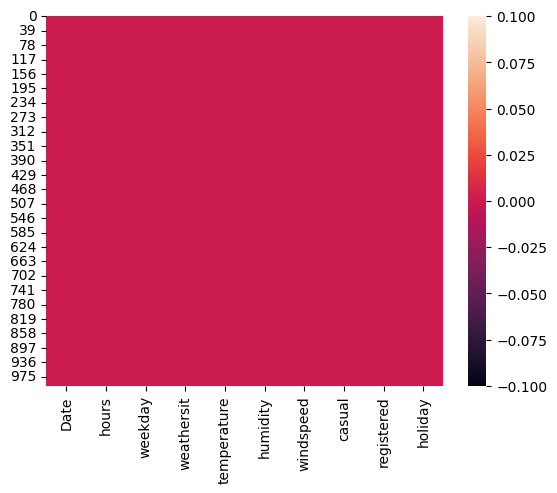

In [81]:
# no null data found in dataset 5

sns.heatmap(data5.isnull())

# final Dataset is Dataset 5

In [82]:
data5

,Date,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered,holiday
0,2011-01-01,0,6,1,0.2879,0.81,0.0000,3,13,False
1,2011-01-01,1,6,1,0.2727,0.80,0.0000,8,32,False
2,2011-01-01,2,6,1,0.2727,0.80,0.0000,5,27,False
3,2011-01-01,3,6,1,0.2879,0.75,0.0000,3,10,False
4,2011-01-01,4,6,1,0.2879,0.75,0.0000,0,1,False
...,...,...,...,...,...,...,...,...,...,...
995,2011-12-02,19,6,1,0.2727,0.38,0.1642,2,39,False
996,2011-12-02,20,6,1,0.2576,0.41,0.2239,1,39,False
997,2011-12-02,21,6,1,0.3030,0.41,0.0000,9,42,False
998,2011-12-02,22,6,1,0.2576,0.44,0.0896,6,39,False


In [83]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1000 non-null   datetime64[ns]
 1   hours        1000 non-null   int64         
 2   weekday      1000 non-null   int64         
 3   weathersit   1000 non-null   int64         
 4   temperature  1000 non-null   float64       
 5   humidity     1000 non-null   float64       
 6   windspeed    1000 non-null   float64       
 7   casual       1000 non-null   int64         
 8   registered   1000 non-null   int64         
 9   holiday      1000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5)
memory usage: 71.4 KB


# find and remove outlier from Data set 5 using IQR method

In [84]:
data5.shape

(1000, 10)

In [85]:
data5.describe()

,Date,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2011-04-13 20:05:16.799999744,11.753000,2.982000,1.480000,0.211793,0.582480,0.194931,4.921000,53.383000
min,2011-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.210000,0.000000,0.000000,0.000000
25%,2011-01-22 00:00:00,6.000000,1.000000,1.000000,0.166700,0.440000,0.104500,0.000000,15.000000
50%,2011-02-02 00:00:00,12.000000,3.000000,1.000000,0.212100,0.550000,0.164200,3.000000,46.000000
75%,2011-07-02 00:00:00,18.000000,5.000000,2.000000,0.257600,0.700000,0.283600,6.000000,74.000000
max,2011-12-02 00:00:00,23.000000,6.000000,4.000000,0.454500,1.000000,0.582100,62.000000,247.000000
std,NaN,6.899101,2.091423,0.651171,0.076295,0.187977,0.129126,7.643899,47.893968


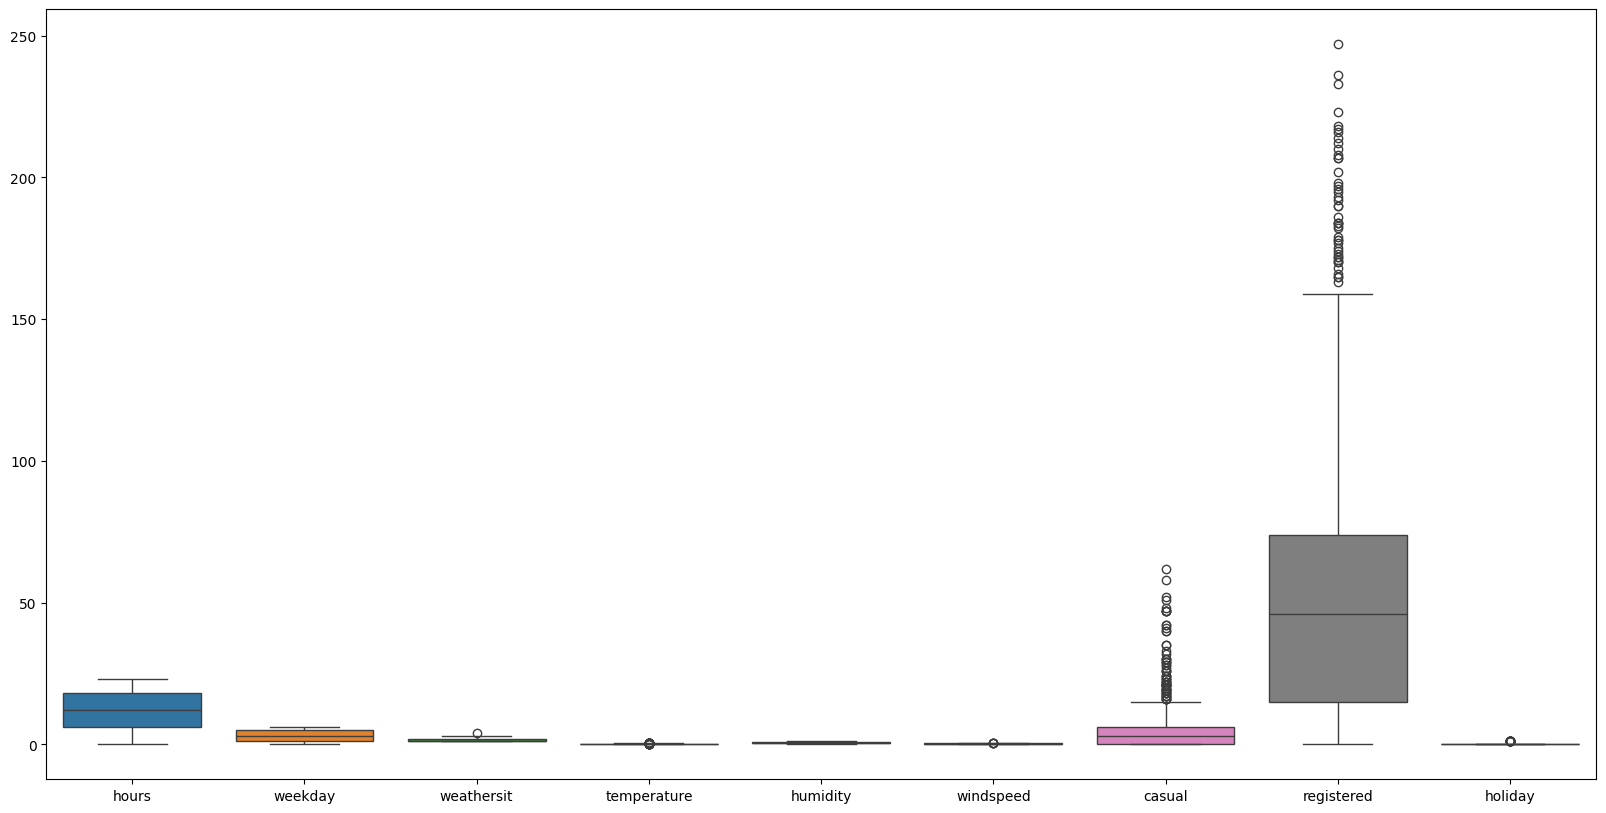

In [86]:
# outlier show in boxplot

plt.figure(figsize=(20,10))
sns.boxplot(data = data5 )
plt.show()

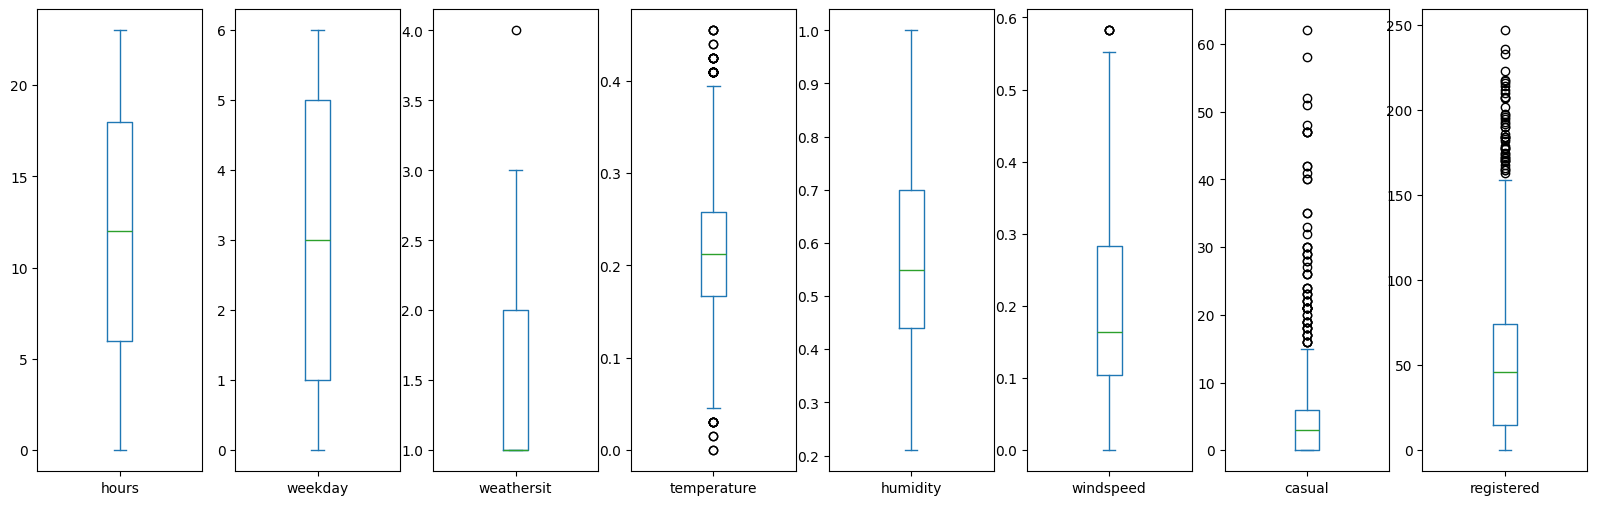

In [87]:
data5.plot( kind = "box",subplots = True ,sharey = False , figsize = ( 20,6) )

plt.show()

In [88]:
# remove outlier in dataset

def outliers(data,columns) :

    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)
    IQR = q3 - q1
    min_range = q1 - (1.5 * IQR)
    max_range = q1 + (1.5 * IQR) 
    
    ls = data.index[ (data[columns] < min_range) | (data[columns] > max_range)]

    return ls
    

In [89]:
index_list = []

for col in data5[["temperature","casual","registered"]] :
    index_list.extend(outliers(data5,col))

index_list


[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 109,
 110,
 116,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 213,
 216,
 218,
 247,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 297,
 331,
 332,
 333,
 334,
 335,
 422,
 425,
 426,
 453,
 458,
 459,
 460,
 461,
 463,
 464,
 465,
 467,
 468,
 469,
 470,
 472,
 473,
 474,
 475,
 494,
 495,
 496,
 497,
 498,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 642,
 709,
 710,
 711,
 712,
 713,
 714,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 767,
 792,
 793,
 945,
 947,
 948,
 990,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 22,
 23,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 154,
 155,
 156,
 157,
 190,
 193,
 214,
 237,
 242,
 260,
 261,
 262,
 263,
 264,
 282,
 283,
 284,
 285,
 286,
 306,
 326,
 329,
 330,
 331,
 332,
 333,
 334,
 336,
 337,
 380,
 399,
 401,
 402,
 403,
 422,

In [90]:
def remove_outliers(data,ls) :
     ls = sorted(set(ls))
     data = data.drop(ls)
     return data

In [91]:
data_clened = remove_outliers(data5 , index_list)

In [92]:
data_clened .shape

(708, 10)

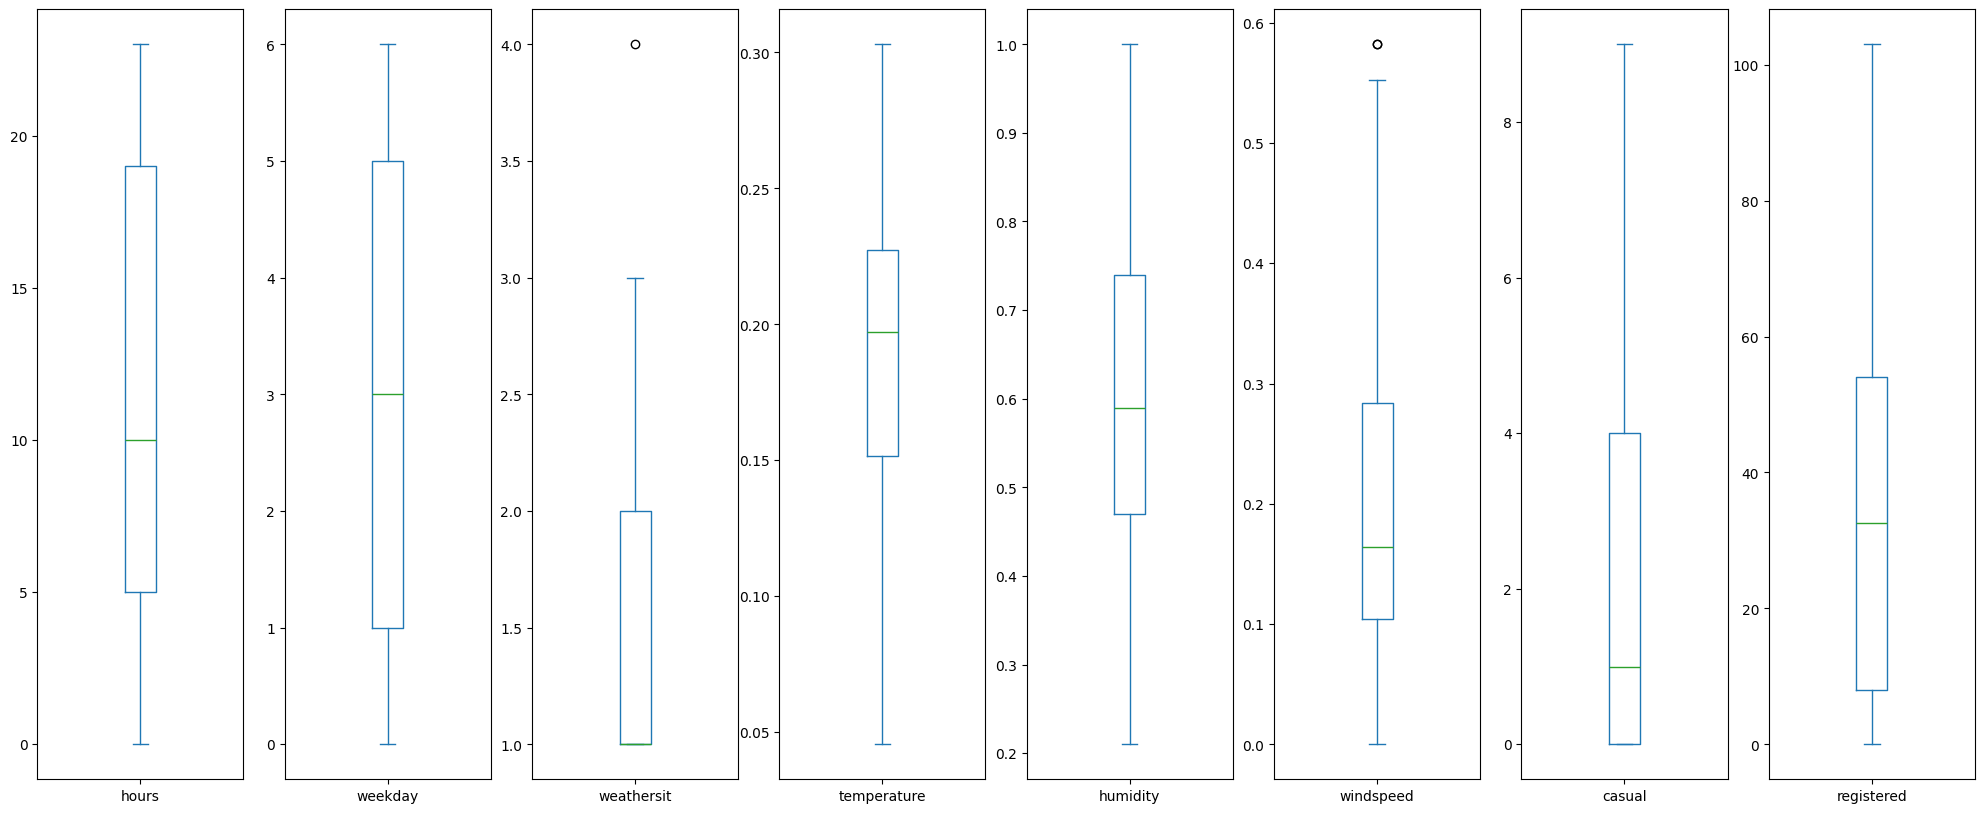

In [93]:
data_clened.plot( kind = "box",subplots = True ,sharey = False , figsize = ( 25,10) )
plt.show()

<Axes: xlabel='registered'>

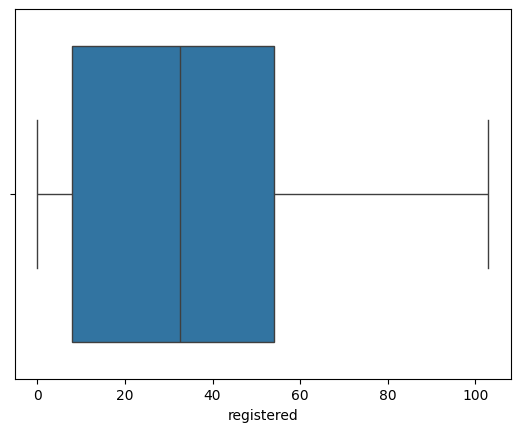

In [94]:
sns.boxplot(x = "registered" , data = data_clened)

In [95]:
data_clened.to_csv("data5.csv",index = False)

# Measure of shape and check skewness

In [96]:
data_clened.columns

Index(['Date', 'hours', 'weekday', 'weathersit', 'temperature', 'humidity',
       'windspeed', 'casual', 'registered', 'holiday'],
      dtype='object')

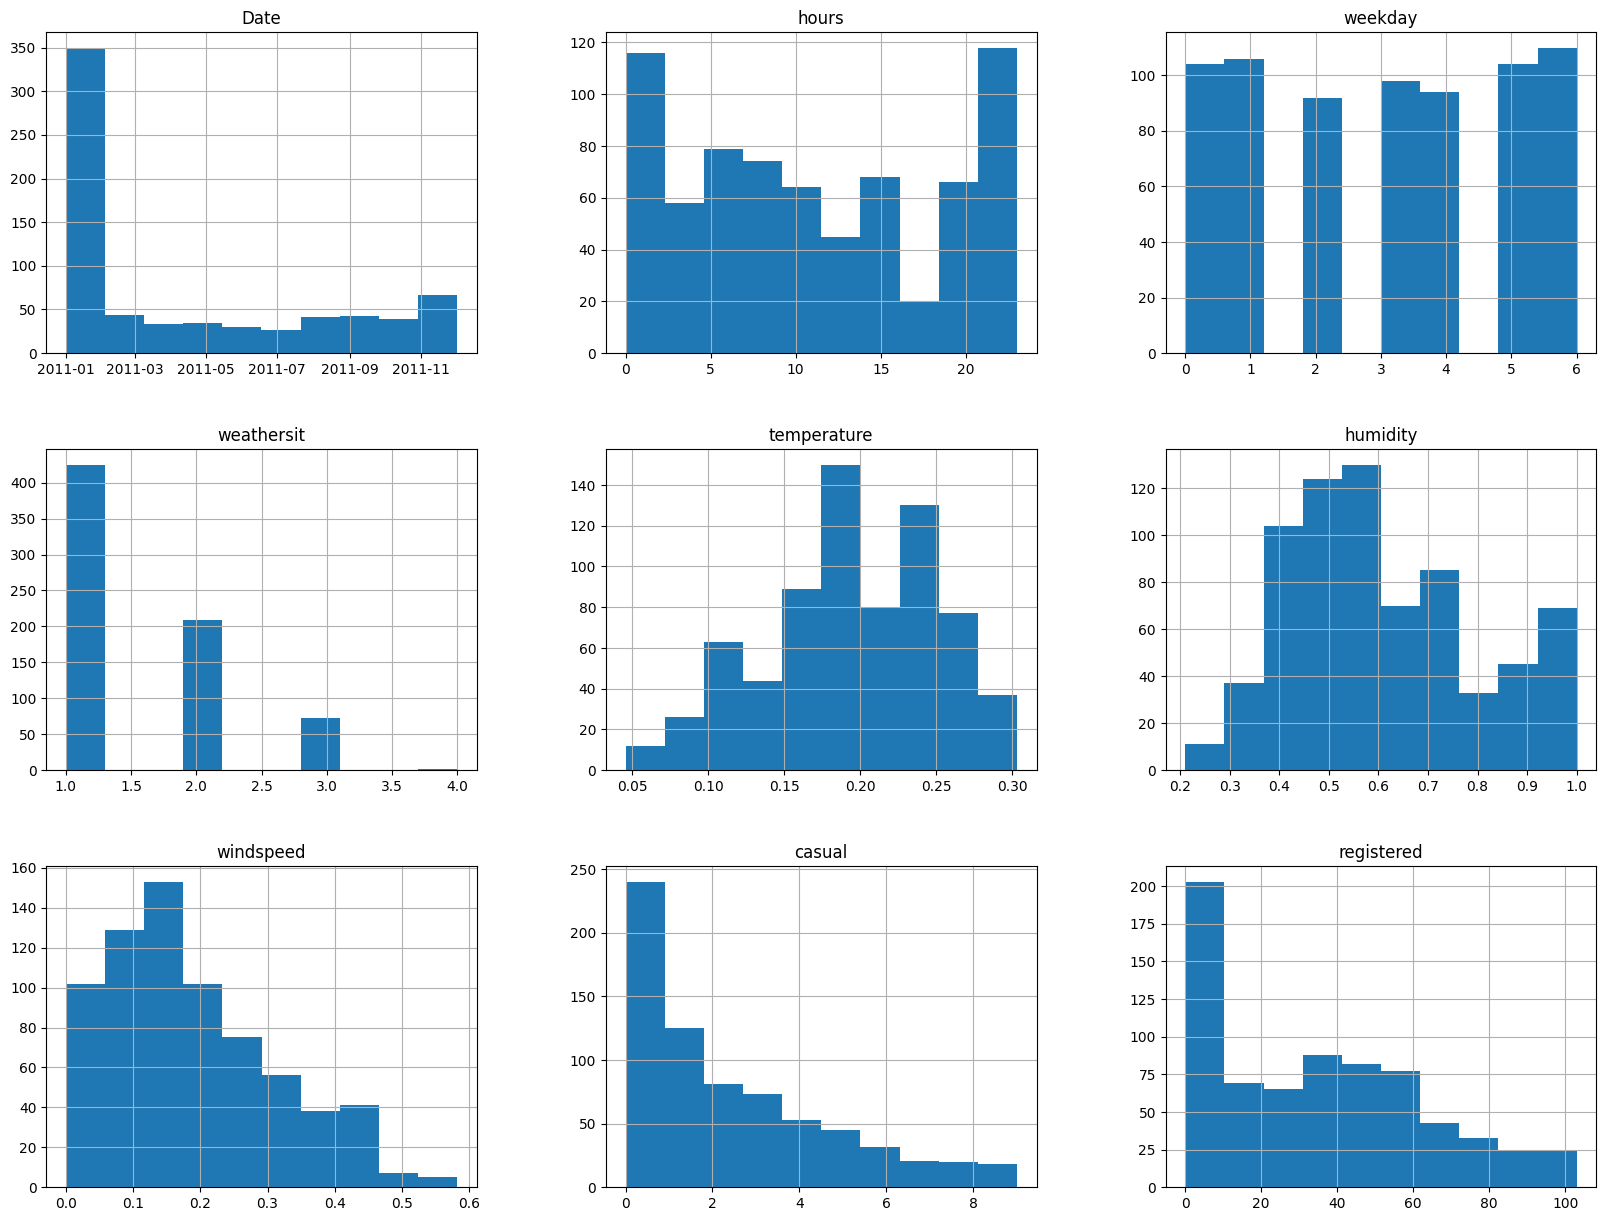

In [97]:
data_clened.hist(figsize = (20,15))

plt.show()

In [98]:
data_clened[["hours","weekday","weathersit","temperature","humidity","windspeed","casual","registered"]].skew()

hours          0.162631
weekday       -0.008666
weathersit     1.025246
temperature   -0.304513
humidity       0.374288
windspeed      0.529917
casual         1.049243
registered     0.502220
dtype: float64

In [99]:
a = data_clened[["hours","weekday","weathersit","temperature","humidity","windspeed","casual","registered"]].mean()

In [100]:
b = data_clened[["hours","weekday","weathersit","temperature","humidity","windspeed","casual","registered"]].median()

In [101]:
c = data_clened[["hours","weekday","weathersit","temperature","humidity","windspeed","casual","registered"]].mode()

In [102]:
a,b,c

(hours          11.042373
 weekday         3.022599
 weathersit      1.505650
 temperature     0.193510
 humidity        0.603686
 windspeed       0.187797
 casual          2.265537
 registered     35.001412
 dtype: float64,
 hours          10.0000
 weekday         3.0000
 weathersit      1.0000
 temperature     0.1970
 humidity        0.5900
 windspeed       0.1642
 casual          1.0000
 registered     32.5000
 dtype: float64,
    hours  weekday  weathersit  temperature  humidity  windspeed  casual  \
 0    7.0      6.0         1.0       0.1970      0.93        0.0     0.0   
 1    NaN      NaN         NaN       0.2273       NaN        NaN     NaN   
 
    registered  
 0         1.0  
 1         NaN  )

In [103]:
data_clened.shape

(708, 10)

In [104]:
a = data_clened[["hours","weekday","weathersit","temperature","humidity","windspeed","casual","registered"]]
a

,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered
0,0,6,1,0.2879,0.81,0.0000,3,13
1,1,6,1,0.2727,0.80,0.0000,8,32
2,2,6,1,0.2727,0.80,0.0000,5,27
3,3,6,1,0.2879,0.75,0.0000,3,10
4,4,6,1,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...
995,19,6,1,0.2727,0.38,0.1642,2,39
996,20,6,1,0.2576,0.41,0.2239,1,39
997,21,6,1,0.3030,0.41,0.0000,9,42
998,22,6,1,0.2576,0.44,0.0896,6,39


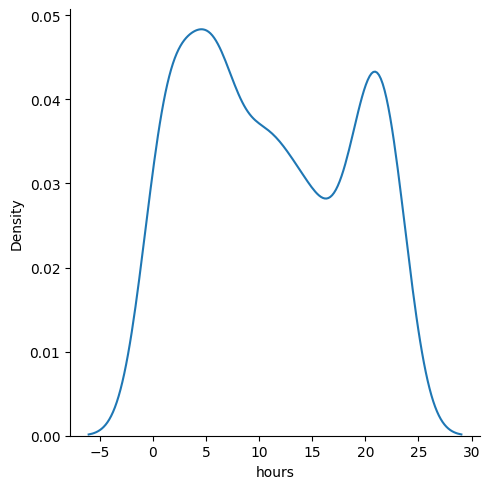

<Figure size 2000x1500 with 0 Axes>

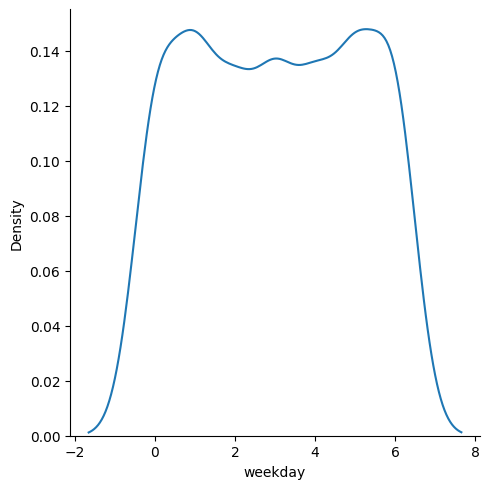

<Figure size 2000x1500 with 0 Axes>

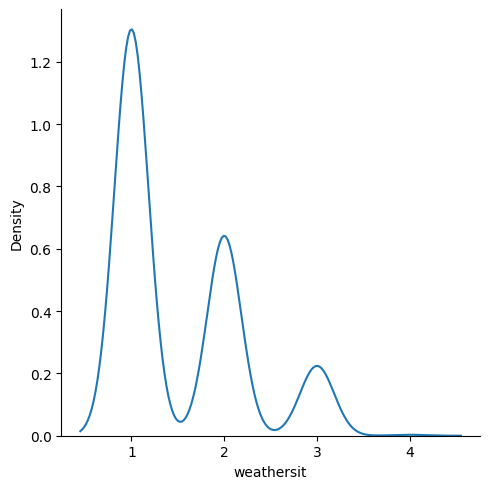

<Figure size 2000x1500 with 0 Axes>

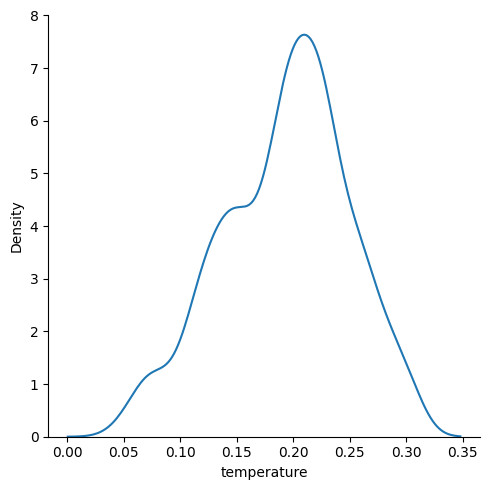

<Figure size 2000x1500 with 0 Axes>

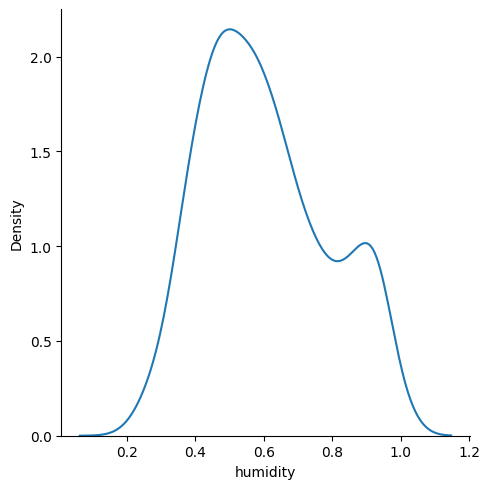

<Figure size 2000x1500 with 0 Axes>

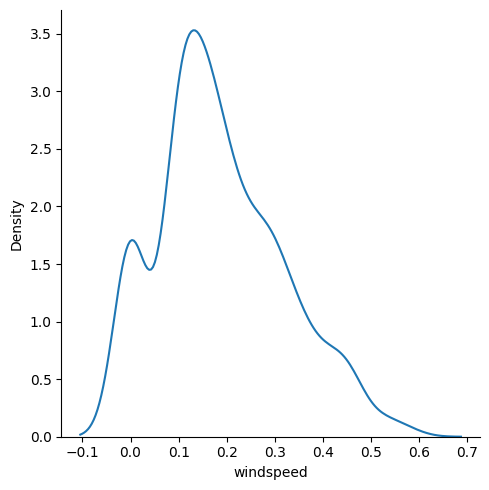

<Figure size 2000x1500 with 0 Axes>

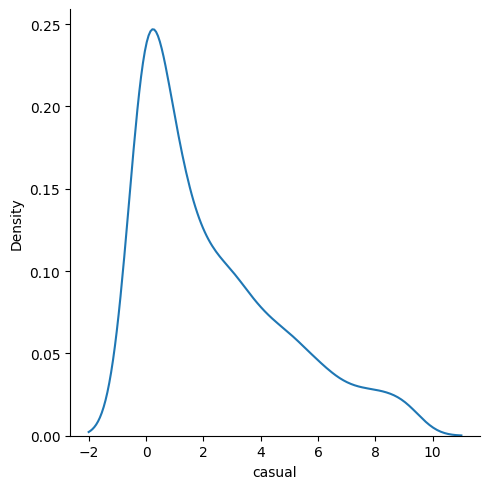

<Figure size 2000x1500 with 0 Axes>

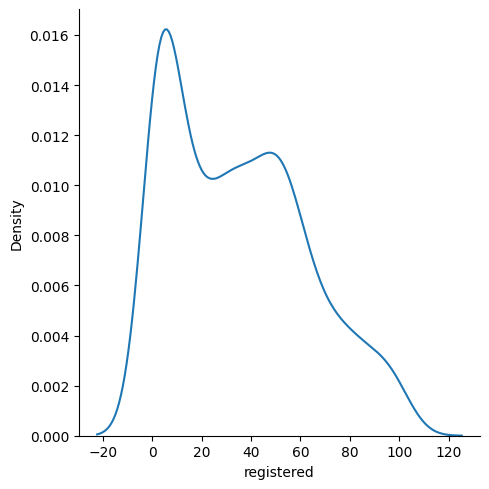

<Figure size 2000x1500 with 0 Axes>

In [105]:
for i in a :
    sns.displot(data = data_clened , x = i ,kind = "kde" , facet_kws = {"sharey" : False ,"sharex" : False } )
    plt.figure(figsize = (20,15))



# check covariance and corrlation of  Data set 5

In [106]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1000 non-null   datetime64[ns]
 1   hours        1000 non-null   int64         
 2   weekday      1000 non-null   int64         
 3   weathersit   1000 non-null   int64         
 4   temperature  1000 non-null   float64       
 5   humidity     1000 non-null   float64       
 6   windspeed    1000 non-null   float64       
 7   casual       1000 non-null   int64         
 8   registered   1000 non-null   int64         
 9   holiday      1000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(5)
memory usage: 71.4 KB


In [107]:
x = data5.select_dtypes(["int64","float64"]).corr()
x

,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered
hours,1.000000,0.007531,-0.055802,0.148514,-0.194853,0.116640,0.204476,0.357042
weekday,0.007531,1.000000,0.060007,-0.051462,0.062469,-0.056754,-0.047363,0.020505
weathersit,-0.055802,0.060007,1.000000,0.136909,0.539402,-0.177655,-0.096346,-0.119234
temperature,0.148514,-0.051462,0.136909,1.000000,0.192282,-0.212198,0.423522,0.138464
humidity,-0.194853,0.062469,0.539402,0.192282,1.000000,-0.385550,-0.259407,-0.229370
windspeed,0.116640,-0.056754,-0.177655,-0.212198,-0.385550,1.000000,0.129392,0.090059
casual,0.204476,-0.047363,-0.096346,0.423522,-0.259407,0.129392,1.000000,0.337706
registered,0.357042,0.020505,-0.119234,0.138464,-0.229370,0.090059,0.337706,1.000000


In [108]:
y = data5.select_dtypes(["int64","float64"]).cov()
y

,hours,weekday,weathersit,temperature,humidity,windspeed,casual,registered
hours,47.597589,0.108663,-0.250691,0.078173,-0.252700,0.103909,10.783270,117.975577
weekday,0.108663,4.374050,0.081722,-0.008212,0.024559,-0.015327,-0.757179,2.053948
weathersit,-0.250691,0.081722,0.424024,0.006802,0.066026,-0.014938,-0.479560,-3.718559
temperature,0.078173,-0.008212,0.006802,0.005821,0.002758,-0.002091,0.246996,0.505961
humidity,-0.252700,0.024559,0.066026,0.002758,0.035335,-0.009358,-0.372737,-2.065015
windspeed,0.103909,-0.015327,-0.014938,-0.002091,-0.009358,0.016674,0.127713,0.556956
casual,10.783270,-0.757179,-0.479560,0.246996,-0.372737,0.127713,58.429188,123.632890
registered,117.975577,2.053948,-3.718559,0.505961,-2.065015,0.556956,123.632890,2293.832143


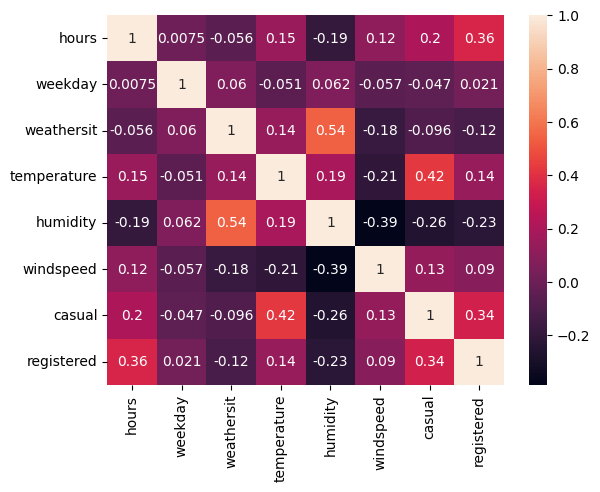

In [109]:
# correlation graph , range ( -1 to 1 )
sns.heatmap(x ,annot= True)
plt.show()

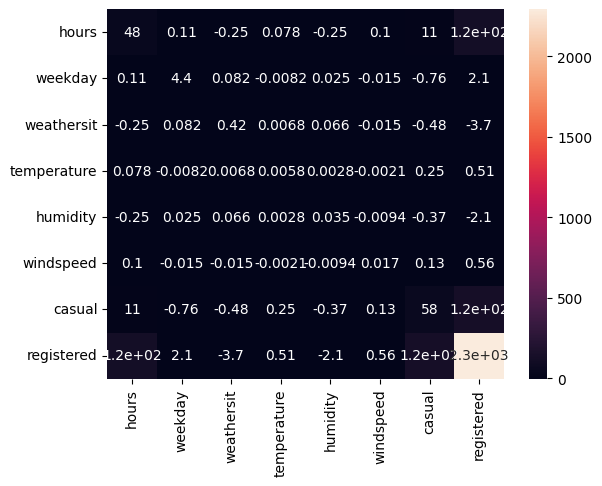

In [110]:
# covariance graph
sns.heatmap(y , annot = True)
plt.show()

#                     ================== End of project ================